In [1]:
# unwrapped hyperperam sweep

# dwnload images one at a time

# 070923 - trying greyscale images

In [67]:
date = '110923'
save_location = r'saves/'

In [52]:
!pip install tqdm

     |████████████████████████████████| 78 kB 9.0 MB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
#import wget
import pandas as pd

import os
from torch.nn import functional
from zipfile import ZipFile
import cv2

import tensorflow as tf

import pickle
#import umap.umap_ as umap
import seaborn as sns

#from boxsdk import OAuth2, Client
from boxsdk import OAuth2, Client
import os
import numpy as np
import requests
from PIL import Image
import io
from IPython.display import clear_output

from tqdm import tqdm
import wandb

from functions import Unwrap, label_oh_tf, loop, import_imagedata, ImageProcessor, test_loop, get_data

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
wandb.login()

wandb: Currently logged in as: naughticalnonsence (antvis). Use `wandb login --relogin` to force relogin


True

In [2]:
device = "cuda:1" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:1 device


In [3]:
IP = ImageProcessor(device)

x_train, _, _,_,_,_ = get_data() 

In [15]:
x = x_train[8]
#im= IP.colour_size_tense(x, 'nored', [113, 36])

im = cv2.imread(x,cv2.IMREAD_UNCHANGED)

"""im = IP.two_channels(im[:,:,1], im[:,:,2])
print(type(im), im.shape)
"""
#print(im.shape[0])
#print(im.shape[1])
IP.view(im,4)


array([[[ 7,  6,  8],
        [ 8,  7,  9],
        [ 8,  7,  9],
        ...,
        [ 4,  3,  7],
        [ 3,  2,  6],
        [ 4,  3,  7]],

       [[ 8,  7,  9],
        [ 8,  7,  9],
        [ 8,  7,  9],
        ...,
        [ 4,  3,  7],
        [ 4,  3,  7],
        [ 5,  4,  8]],

       [[ 8,  7,  9],
        [ 8,  7,  9],
        [ 8,  7,  9],
        ...,
        [ 5,  4,  8],
        [ 5,  4,  8],
        [ 5,  4,  8]],

       ...,

       [[ 4,  3,  7],
        [ 5,  4,  8],
        [ 7,  6, 10],
        ...,
        [ 9,  8, 12],
        [ 8,  7, 11],
        [ 9,  8, 12]],

       [[ 5,  4,  6],
        [ 6,  5,  7],
        [ 6,  5,  9],
        ...,
        [10,  8, 14],
        [10,  8, 14],
        [10,  8, 14]],

       [[ 6,  5,  7],
        [ 7,  6,  8],
        [ 7,  6, 10],
        ...,
        [10,  8, 14],
        [10,  8, 14],
        [11,  9, 15]]], dtype=uint8)

(2880, 2880, 3)
[[[10  9 13]
  [11 10 14]
  [11 10 14]
  ...
  [ 6  5  9]
  [ 7  6 10]
  [ 8  7 11]]

 [[ 9  8 12]
  [10  9 13]
  [11 10 14]
  ...
  [ 6  5  9]
  [ 7  6 10]
  [ 8  7 11]]

 [[ 7  6 10]
  [ 9  8 12]
  [10  9 13]
  ...
  [ 7  6  8]
  [ 8  7 11]
  [ 7  6 10]]

 ...

 [[ 4  3  5]
  [ 3  2  4]
  [ 3  2  4]
  ...
  [ 6  5  7]
  [ 7  6  8]
  [ 7  6  8]]

 [[ 4  3  5]
  [ 3  2  4]
  [ 3  2  4]
  ...
  [ 6  5  7]
  [ 7  6  8]
  [ 7  6  8]]

 [[ 5  4  6]
  [ 4  3  5]
  [ 4  3  5]
  ...
  [ 6  5  7]
  [ 6  5  7]
  [ 7  6  8]]]


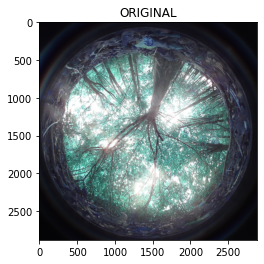

(2880, 2880)
[[10 11 11 ...  6  7  8]
 [ 9 10 11 ...  6  7  8]
 [ 7  9 10 ...  7  8  7]
 ...
 [ 4  3  3 ...  6  7  7]
 [ 4  3  3 ...  6  7  7]
 [ 5  4  4 ...  6  6  7]]


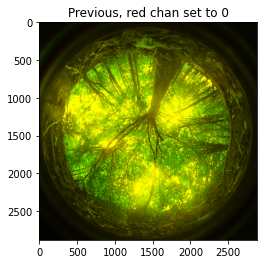

RG RG RG RG (2880, 5760)
post array (2, 2880, 2880)
[[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 9 10 10 ...  5  6  7]
  [ 8  9 10 ...  5  6  7]
  [ 6  8  9 ...  6  7  6]
  ...
  [ 3  2  2 ...  5  6  6]
  [ 3  2  2 ...  5  6  6]
  [ 4  3  3 ...  5  5  6]]]
post transpose (2880, 2880, 2)
[[[ 0  9]
  [ 0 10]
  [ 0 10]
  ...
  [ 0  5]
  [ 0  6]
  [ 0  7]]

 [[ 0  8]
  [ 0  9]
  [ 0 10]
  ...
  [ 0  5]
  [ 0  6]
  [ 0  7]]

 [[ 0  6]
  [ 0  8]
  [ 0  9]
  ...
  [ 0  6]
  [ 0  7]
  [ 0  6]]

 ...

 [[ 0  3]
  [ 0  2]
  [ 0  2]
  ...
  [ 0  5]
  [ 0  6]
  [ 0  6]]

 [[ 0  3]
  [ 0  2]
  [ 0  2]
  ...
  [ 0  5]
  [ 0  6]
  [ 0  6]]

 [[ 0  4]
  [ 0  3]
  [ 0  3]
  ...
  [ 0  5]
  [ 0  5]
  [ 0  6]]]
post concat (2880, 2880, 2)
dgh eibtr
<class 'numpy.ndarray'>


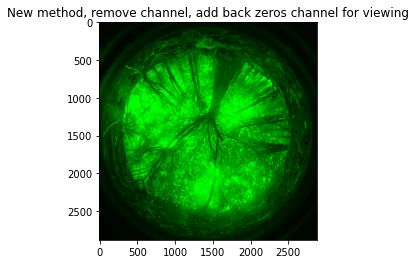

[[[0.         0.03529412 0.        ]
  [0.         0.03921569 0.        ]
  [0.         0.03921569 0.        ]
  ...
  [0.         0.01960784 0.        ]
  [0.         0.02352941 0.        ]
  [0.         0.02745098 0.        ]]

 [[0.         0.03137255 0.        ]
  [0.         0.03529412 0.        ]
  [0.         0.03921569 0.        ]
  ...
  [0.         0.01960784 0.        ]
  [0.         0.02352941 0.        ]
  [0.         0.02745098 0.        ]]

 [[0.         0.02352941 0.        ]
  [0.         0.03137255 0.        ]
  [0.         0.03529412 0.        ]
  ...
  [0.         0.02352941 0.        ]
  [0.         0.02745098 0.        ]
  [0.         0.02352941 0.        ]]

 ...

 [[0.         0.01176471 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  ...
  [0.         0.01960784 0.        ]
  [0.         0.02352941 0.        ]
  [0.         0.02352941 0.        ]]

 [[0.         0.01176471 0.        ]
  [0.         0.00784314 0.        ]


"\ntesty= IP.two_channels(testy[:,:,0],testy[:,:,1])\ntesty=np.array(testy)\nplt.imshow(testy)\nplt.show()\nprint(testy.shape)\ntesty = np.transpose(testy, (1, 2, 0))\n#np.ndarray.reshape(testy, (testy[1], testy[2], testy[0]))\ntesty = np.resize(testy, (32, 32,2))\nprint(testy.shape)\nnew_cols = np.zeros((32, 32,1))\n\n\ntesty = np.concatenate([testy, new_cols], axis=-1)\nprint(testy.shape)\n\nplt.imshow(testy)\nplt.show()\n\n#testx = IP.colour_size_tense(x, 'noblue', [116, 36])\n"

In [14]:


x = x_train[7]

testy= cv2.imread(x,cv2.IMREAD_UNCHANGED)
print(testy.shape)
print(testy)
plt.imshow(testy)
plt.title('ORIGINAL')
plt.show()
r = testy [:,:,2]
g = testy[:,:,1]
b = testy[:,:,0]
print(b.shape)
print(b)

zero_red = testy
zero_red[:,:,2] = np.zeros([zero_red.shape[0], zero_red.shape[1]])




plt.imshow(zero_red)
plt.title('Previous, red chan set to 0')
plt.show()

#rgb = np.concatenate([b, g, r], axis=-1)
rg = np.concatenate([r, g], axis=-1)

print('RG RG RG RG',rg.shape)
#rgb = np.resize(rgb,(2880, 2880))
#print(,rgb.shape)
#plt.imshow(rgb)
#plt.show()
#testyy = np.array(testy)
#print(testy)
#plt.imshow(testy)
#plt.show()
#
#print(testyy.shape)


imlist =[[],[]]
imlist[0]= r
imlist[1] =g
imlist=np.array(imlist)
print('post array',imlist.shape)
print(imlist)
#img_rmvd = np.delete(testy, 1, axis=2)
imlist = np.transpose(imlist, (1, 2, 0))
print('post transpose',imlist.shape)
print(imlist)
zeros = np.zeros((2880, 2880, 1))          
img = np.concatenate([imlist, zeros], axis=-1)/255 # w h 2c.
print('post concat', imlist.shape)
#print(img)
print('dgh eibtr')
print(type(img))
plt.imshow(img)
plt.title('New method, remove channel, add back zeros channel for viewing')
plt.show()
print(img)

#print(img)

"""
testy= IP.two_channels(testy[:,:,0],testy[:,:,1])
testy=np.array(testy)
plt.imshow(testy)
plt.show()
print(testy.shape)
testy = np.transpose(testy, (1, 2, 0))
#np.ndarray.reshape(testy, (testy[1], testy[2], testy[0]))
testy = np.resize(testy, (32, 32,2))
print(testy.shape)
new_cols = np.zeros((32, 32,1))


testy = np.concatenate([testy, new_cols], axis=-1)
print(testy.shape)

plt.imshow(testy)
plt.show()

#testx = IP.colour_size_tense(x, 'noblue', [116, 36])
"""

In [30]:
num_list = []
for file in os.listdir(file_path):

    if file[5:7] == 0 or file[5:7]=='0':
        print('000')
    elif file[0:7] not in num_list:
        num_list.append(file[5:7])
    print(num_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:


def greyimg(file_path, data_split=x_train):
    if isinstance(file_path, str):
        img = cv2.imread(file_path, cv2.COLOR_BGR2GRAY)
    elif isinstance(file_path, int):
        img = cv2.imread(data_split[file_path], cv2.COLOR_BGR2GRAY)
    return img



IPB = ImageProcessor(device, 'noblue', [32,32])
IPG = ImageProcessor(device, 'nogreen', [32,32])
IPR = ImageProcessor(device, 'nored', [32,32])

In [189]:
x =x_train[6] #BGR
img = cv2.imread(x)

r = img[:,:,2]
g = img[:,:,1]
b= img[:,:,0]


# no red channel
zero_r = [[],[]] #h w c
zero_r[1] = g
zero_r[0] = b
#print('red',zero_r[1])
zero_r = np.array(zero_r)
#print(zero_r.shape)

#no blue channel
zero_b = [[],[]]
zero_b[0]= g
zero_b[1] =r
#print(img[:,:,1])
zero_b = np.array(zero_b)

# no green channel
zero_g = [[],[]]
zero_g[0] = b
zero_g[1] = r
zero_g= np.array(zero_g)


print(zero_g.shape)
print(img[:,:,2])
print(zero_g)


(2880, 2880, 3)
(2, 2880, 2880)
[[ 8  8  8 ... 10 10 10]
 [ 7  7  7 ...  9  9  9]
 [ 7  7  7 ... 10 10 10]
 ...
 [ 7  7  6 ... 12 11 10]
 [ 6  7  7 ... 11 11 10]
 [ 7  8  7 ... 11 11 11]]
[[[ 5  5  5 ...  6  6  6]
  [ 4  4  4 ...  5  5  5]
  [ 4  4  4 ...  6  6  6]
  ...
  [ 6  6  5 ... 10  9  8]
  [ 5  6  6 ...  9  9  8]
  [ 6  7  6 ...  9  9  9]]

 [[ 8  8  8 ... 10 10 10]
  [ 7  7  7 ...  9  9  9]
  [ 7  7  7 ... 10 10 10]
  ...
  [ 7  7  6 ... 12 11 10]
  [ 6  7  7 ... 11 11 10]
  [ 7  8  7 ... 11 11 11]]]


torch.Size([1, 3, 144, 452])
torch.Size([3, 144, 452])
torch.Size([144, 452, 3])


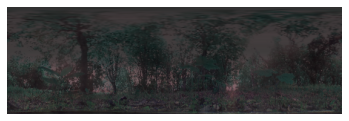

torch.Size([1, 3, 144, 452])
torch.Size([3, 144, 452])
torch.Size([144, 452, 3])


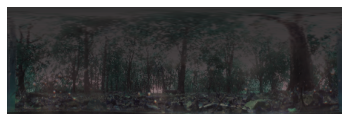

torch.Size([1, 3, 144, 452])
torch.Size([3, 144, 452])
torch.Size([144, 452, 3])


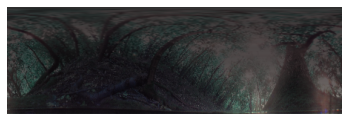

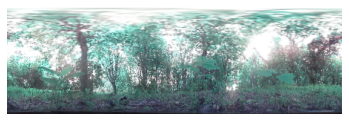

In [142]:
# check images
for i in range(3):
    tenso = tensoring(x_train[i])
    print(tenso.shape)
    tenso = tenso.squeeze()
    print(tenso.shape)
    tenso= tenso.permute(1, 2, 0)    ######### <<--------- The change
    print(tenso.shape)
    tenso = np.array(tenso.cpu()) * 4

    plt.imshow(tenso, cmap=plt.get_cmap('gray'))
    plt.axis(False)
    plt.show()

test_im = x_train[0]
#print(test_im, type(test_im))
test_im = greyimg(test_im)
test_im = Unwrap(test_im)
plt.imshow(test_im)
plt.axis(False)
plt.show()

In [15]:

print(np.unique(y_train))

['-1' '0' '1' '10' '2' '3' '4' '5' '6' '7' '8' '9']


In [50]:
1034/11

94.0

In [95]:
config= dict(
    epochs = 5,
    learning_rate= 5e-6,
    batch_size = 94,
    data_set = 'IDSW',
    architecture = 'CNN'
)

In [99]:

#: __init__() takes 1 positional argument but 3 were given
def make(config):
    #make model
    model= vgg16TorchNet().to(device)
    
    # loss and optimizer
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
    
    return model, loss_fn, optimizer


def train_log(loss, sample_count, epoch):
    wandb.log({'epoch': epoch,
              'loss': loss},
             step=sample_count)
    print(f'loss after {str(sample_count).zfill(5)} examples: {loss:.3f}')

In [118]:
# Define model - copy of what worked on MNIST
class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  # 1, 2, 144, 452
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2),
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5), # (1x258048 and 16384x100)
          )

        self.linear_1 = nn.Sequential(    #1x16384 and 4096x100)
            nn.Linear(258048, 100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(100,11),
            nn.Softmax(),
        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      #print('conv x', x.shape)
      x = self.linear_1(x)
      #print('lin1 x', x)
      return x



In [123]:
# train loop
def train_loop(model, x_train, y_train, epoch, optimizer, loss_fn):
    model.train()

    predict_list = []
    total_count = 0
    num_correct = 0
    current_loss = 0
    lr_ls = []

    total_samples = len(x_train)


    for idx, img in enumerate(x_train):
        tense = tensoring(img)
        lr_ls.append(optimizer.param_groups[0]['lr']) # for lr scheduler
        
        #forward pass
        prediction = model.forward(tense)
        label = label_oh_tf(y_train[idx]) # could pop this in lil function
        loss = loss_fn(prediction, label)
        #predict_list.append(prediction.argmax())


        #if prediction.argmax() == label.argmax():
        #  print(f'\n ########################### HIT ###########################  -- {idx} / {total_samples} \n')
        #  num_correct +=1
        #else:
        #    pass

        total_count+=1
        current_loss += loss.item()
                              
        #Back pass
        optimizer.zero_grad()
        loss.backward()
                              
        #update W&B
        optimizer.step()

    #       train_loss, train_predict_loss,t_num_correct, model, optimizer, 
    return current_loss, predict_list, num_correct, model, optimizer #, lr_ls





In [121]:
# validation loop

def validation_loop(model, x_val, y_val, epoch, loss_fn):
  model = model
  x_val = x_val
  y_val = y_val

  model.eval()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0

  for idx, img in enumerate(x_val):
      tense_img = tensoring(img)
      prediction = model.forward(tense_img)
      label = label_oh_tf(y_val[idx])

      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      if prediction.argmax() == label.argmax():
          num_correct +=1
      else:
        pass
      total_count+=1

      current_loss += loss.item()

  return current_loss, predict_list, num_correct





In [ ]:
"""def loop(model, X, Y, epoch, optimizer =None, loss_fun, train =True):
    model = model
    X = X
    Y = Y
    
    if train:
        #wandb.watch(model, loss_fn, log='all', log-freq=10)
        model.train()
        lr_ls = []
    else:
        model.eval()
        total_samples = len(x_train)
    
    predict_list = []
    total_count = 0
    num_correct = 0
    current_loss = 0

    for idx, img in enumerate(X):
        tense = tensoring(img)
        prediction = model.forward(tense)	
        label = label_oh_tf(y_train[idx])

        if train:
            lr_ls.append(optimizer.param_groups[0]['lr'])

        loss = loss_fn(prediction, label)
            predict_list.append(prediction.argmax())

        if prediction.argmax() == label.argmax():
            if train:
                #print(f'\n ########################### HIT ###########################  -- {idx} / {total_samples} \n')
            num_correct +=1

        total_count+=1
            current_loss += loss.item()
        if train:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            return current_loss, predict_list, num_correct, model, optimizer, lr_ls
        else:
            return current_loss, predict_list, num_correct"""



In [ ]:
t_loss_list = []
t_predict_list =[]
t_accuracy_list = []

v_loss_list = []
v_predict_list =[]
v_accuracy_list = []

total_epochs = 0

title = f'IDSW_GB_'
save_dict = {'Run' : title,
            'Current_Epoch': 0}

In [111]:
def print_run_header(learning_rate, loss_fn): #optim, 
                        print('\n')
                        print('LR: ', learning_rate)
                        #print('optimiser: ', optim)
                        print('loss fn: ', loss_fn)
                    
def print_run_type(run_type: str):
    print('                  ----------------------')
    print(f' \n                  {run_type}... \n')
    print('                  ----------------------')

def check_best_accuracy(v_accuracy_list, best_valaccuracy):
    if v_accuracy_list[-1] > best_valaccuracy:
        best_valaccuracy = v_accuracy_list[-1]
        best_optim = optimizer
        best_lossfn = loss_fn
        best_lr = learning_rate
        best_epoch = epoch
    return best_valaccuracy, best_optim, best_lossfn, best_lr, best_epoch

def print_top_results(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch):
        print('Top results from hyperparameter sweep:')
        print()
        print(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch)

def set_optimizer(optim):
    optim_list=[]
    if optim =='Adam':
        optimizer1 = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer2 = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)
        optim_list.append(optimizer1)
        optim_list.append(optimizer2)
    elif optim == 'SGD':
        optimizer3 = torch.optim.SGD(model.parameters(), lr=learning_rate)
        optim_list.append(optimizer3)
    return optim_list


In [125]:
def train_model(model, x_train, y_train, x_val, y_val, loss_fn, optimizer, config, fresh_model = True):
    
    #wandb logging
    wandb.watch(model, loss_fn, log='all', log_freq=10)
    

    sample_count = 0
    batch_count =0
    
    for epoch in tqdm(range(config.epochs)):
        #print_run_header(config.learning_rate, optim, config.loss_fn)#

        train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
        sample_count += len(x_train)
        
        val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
        batch_count += 1
        
        if (batch_count +1) %25== 0:
            train_log(train_loss, sample_count, epoch)
        clear_output()

In [ ]:
"""def train_model(device, model, x_train, y_train, x_val, y_val, save_location, date,title, fresh_model = True, epochs= 1):
    #wandb logging
    wandb.watch(model, loss_fn, log='all', log-freq=10)
    total_batches = len(loader)*config.epochs
    sample_count = 0
    batch_count =0
    
if model == None or fresh_model == True:
      model =TorchNet().to(device)
      t_loss_list, t_predict_list, t_accuracy_list, v_loss_list, v_predict_list, v_accuracy_list, total_epochs, title, save_dict = reset_lists(date=date, title=title)
    else:
      total_epochs = save_dict['Current Epoch']

   # settings
    # number of epochs you want to run 
    total_epochs = total_epochs # important for previously made models -- check with above which works
    learning_rate= 1e-4   #5e-5
    loss_fn = torch.nn.MSELoss()   #torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  #, weight_decay=1e-5)#, weight_decay=1e-5)
    optim= 'Adam' # for recording model parameters


    for epoch in tqdm(range(config.epochs)):
        #print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
        print_run_header(learning_rate, optim, loss_fn)#
        print('EPOCH: ', epoch)
        print_run_type('TRAINING')#
        
        train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
        #t_loss_list.append(train_loss)
        #t_predict_list.append(train_predict_loss)
        #t_accuracy_list.append(train_num_correct / len(y_train))
        #final_train_acc = t_accuracy_list[-1]

        print_run_type('VALIDATION')
        val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
        #v_loss_list.append(val_loss)
        #v_predict_list.append(val_predict_loss)
        #v_accuracy_list.append(val_num_correct/ len(y_val))
        #final_val_acc = v_accuracy_list[-1]

        total_epochs += 1 ### Total epochs is from a previous save

        # save model data in dict
        #save_dict['Current Epoch'] = total_epochs
        #save_dict['model.state_dict'] = model.state_dict()
        #save_dict['training_samples'] = len(x_train)
        #save_dict['validation_samples'] = len(x_val)
        #save_dict['t_loss_list'] = t_loss_list
        #save_dict['t_predict_list'] = t_predict_list
        #save_dict['t_accuracy_list'] = t_accuracy_list
        #save_dict['v_loss_list'] = v_loss_list
        #save_dict['v_predict_list'] = v_predict_list
        #save_dict['v_accuracy_list'] = v_accuracy_list
        #save_dict['epochCount']+=1 Now using current_epoch above

        #if epoch == epochs-1:  ### Mabs change this to something like epoch == epochs, so that it only saves the final?
        #    version = f'extra64lay_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}+_Acc_{final_train_acc}_{final_val_acc}'
        #    # save dict 
        #    with open(f'{save_location}/_IDSWforest_epoch{epoch}_{date}_{version}.pkl', 'wb') as f:
        #        pickle.dump(save_dict, f)



        clear_output()
"""

In [137]:
def test_loop(model, x_test, y_test,loss_fn):
    model = model.eval()
    predict_list = []
    total_count = 0
    num_correct = 0
    correct = 0
    
    with torch.no_grad():
        for idx, img in enumerate(x_test):
            tense_img = tensoring(img)
            prediction = model.forward(tense_img)
            label = label_oh_tf(y_test[idx])

            if prediction.argmax() == label.argmax():
                num_correct +=1
            total_count+=1

            correct += (prediction.argmax() == label).sum().item()
            
            print('Correct Answers: ', num_correct)
            print('Total Questions: ', total_count)
            accuracy = 100*(num_correct/ total_count)
            print('% Accuracy: ', accuracy)

            wandb.log({'Test_accuracy': accuracy})

    torch.onnx.export(model, x_test, 'wandbTest.onnx')
    wandb.save('wandbTest.onnx')

In [130]:
def model_pipeline(hyperparams):
    # connect to wandb
    with wandb.init(project='refactoring', config=hyperparams):
        config = wandb.config
    
        # set model
        model, loss_fn, optimizer = make(config) #model, loss_fn, optimizer
        #print(model)

        # train model
        train_model(model, x_train, y_train, x_val, y_val, loss_fn, optimizer, config) #data in one obj?
        # test model
        test_loop(model,  x_test, y_test, loss_fn)
    
    return model

In [138]:
model = model_pipeline(config)

100%|██████████| 5/5 [10:55<00:00, 131.15s/it]


Correct Answers:  0
Total Questions:  1
% Accuracy:  0.0
Correct Answers:  0
Total Questions:  2
% Accuracy:  0.0
Correct Answers:  0
Total Questions:  3
% Accuracy:  0.0
Correct Answers:  1
Total Questions:  4
% Accuracy:  25.0
Correct Answers:  1
Total Questions:  5
% Accuracy:  20.0
Correct Answers:  1
Total Questions:  6
% Accuracy:  16.666666666666664
Correct Answers:  1
Total Questions:  7
% Accuracy:  14.285714285714285
Correct Answers:  1
Total Questions:  8
% Accuracy:  12.5
Correct Answers:  1
Total Questions:  9
% Accuracy:  11.11111111111111
Correct Answers:  2
Total Questions:  10
% Accuracy:  20.0
Correct Answers:  2
Total Questions:  11
% Accuracy:  18.181818181818183
Correct Answers:  2
Total Questions:  12
% Accuracy:  16.666666666666664
Correct Answers:  2
Total Questions:  13
% Accuracy:  15.384615384615385
Correct Answers:  3
Total Questions:  14
% Accuracy:  21.428571428571427
Correct Answers:  3
Total Questions:  15
% Accuracy:  20.0
Correct Answers:  4
Total Ques

Correct Answers:  14
Total Questions:  118
% Accuracy:  11.864406779661017
Correct Answers:  15
Total Questions:  119
% Accuracy:  12.605042016806722
Correct Answers:  15
Total Questions:  120
% Accuracy:  12.5
Correct Answers:  15
Total Questions:  121
% Accuracy:  12.396694214876034
Correct Answers:  15
Total Questions:  122
% Accuracy:  12.295081967213115
Correct Answers:  15
Total Questions:  123
% Accuracy:  12.195121951219512
Correct Answers:  15
Total Questions:  124
% Accuracy:  12.096774193548388
Correct Answers:  15
Total Questions:  125
% Accuracy:  12.0
Correct Answers:  15
Total Questions:  126
% Accuracy:  11.904761904761903
Correct Answers:  15
Total Questions:  127
% Accuracy:  11.811023622047244
Correct Answers:  15
Total Questions:  128
% Accuracy:  11.71875
Correct Answers:  15
Total Questions:  129
% Accuracy:  11.627906976744185
Correct Answers:  15
Total Questions:  130
% Accuracy:  11.538461538461538
Correct Answers:  15
Total Questions:  131
% Accuracy:  11.4503

Correct Answers:  20
Total Questions:  231
% Accuracy:  8.658008658008658
Correct Answers:  20
Total Questions:  232
% Accuracy:  8.620689655172415
Correct Answers:  20
Total Questions:  233
% Accuracy:  8.583690987124463
Correct Answers:  20
Total Questions:  234
% Accuracy:  8.547008547008547
Correct Answers:  20
Total Questions:  235
% Accuracy:  8.51063829787234
Correct Answers:  20
Total Questions:  236
% Accuracy:  8.47457627118644
Correct Answers:  20
Total Questions:  237
% Accuracy:  8.438818565400844
Correct Answers:  20
Total Questions:  238
% Accuracy:  8.403361344537815
Correct Answers:  20
Total Questions:  239
% Accuracy:  8.368200836820083
Correct Answers:  20
Total Questions:  240
% Accuracy:  8.333333333333332
Correct Answers:  21
Total Questions:  241
% Accuracy:  8.71369294605809
Correct Answers:  21
Total Questions:  242
% Accuracy:  8.677685950413224
Correct Answers:  21
Total Questions:  243
% Accuracy:  8.641975308641975
Correct Answers:  21
Total Questions:  24

Traceback (most recent call last):
  File "<ipython-input-130-a116ea1c024c>", line 13, in model_pipeline
    test_loop(model,  x_test, y_test, loss_fn)
  File "<ipython-input-137-9974237ec25b>", line 27, in test_loop
    torch.onnx.export(model, x_test, 'wandbTest.onnx')
  File "/its/home/nn268/.local/lib/python3.8/site-packages/torch/onnx/utils.py", line 506, in export
    _export(
  File "/its/home/nn268/.local/lib/python3.8/site-packages/torch/onnx/utils.py", line 1548, in _export
    graph, params_dict, torch_out = _model_to_graph(
  File "/its/home/nn268/.local/lib/python3.8/site-packages/torch/onnx/utils.py", line 1113, in _model_to_graph
    graph, params, torch_out, module = _create_jit_graph(model, args)
  File "/its/home/nn268/.local/lib/python3.8/site-packages/torch/onnx/utils.py", line 989, in _create_jit_graph
    graph, torch_out = _trace_and_get_graph_from_model(model, args)
  File "/its/home/nn268/.local/lib/python3.8/site-packages/torch/onnx/utils.py", line 893, in _tr

Test_accuracy,█▃█▄▃▃▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Test_accuracy,9.32476


TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mlist of [str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str, str

In [19]:
# Hyperparameter sweep

##### remember to make the pickle folder before running!
##### adapt train loopppp

import pickle
from IPython.display import clear_output
full_label = y_train

def hyperparameter_sweep():
    # a function to loop through hyperparameters for finding the best ones for certain architecture

    epochs = 50

    lr_list = [1e-5,1e-4,1e-3, 5e-6,5e-5, 5e-4] #1e-7, 1e-6, #1e-7,1e-6,1e-5,1e-4,1e-3,1e-2, 5e-4, 5e-3, 5e-2 #1e-6, 5e-3, 5e-4,
    optimiser_list = ['Adam'] #, 'SGD'
    
    lossfn_list = [torch.nn.MSELoss()] #, torch.nn.NLLLoss(), ,

    best_optim = None
    best_lossfn = None
    best_lr = 0
    best_valaccuracy = 0
    best_epoch = 0
    init_lr = 0.1

    for loss_fn in lossfn_list:
        for optim in optimiser_list:
            for learning_rate in lr_list:

                model = vgg16TorchNet().to(device) #model architecture
                optim_list = set_optimizer(optim)
                
                for optimizer in optim_list:
                    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma= init_lr, last_epoch=- 1, verbose=False)
                    
                    t_loss_list = []
                    t_predict_list =[]
                    t_accuracy_list = []

                    v_loss_list = []
                    v_predict_list =[]
                    v_accuracy_list = []

                    total_epochs = 0
                    title = f'forest_HpS_{str(learning_rate)}_{str(optimizer)}_{str(loss_fn)}lecun'
                    save_dict = {'Run' : title,
                                'Current_Epoch': 0}
                    
                    #print_run_header(learning_rate, optim, loss_fn)

                    for epoch in range(epochs):
                      #print_run_header(learning_rate, optim, loss_fn)
                      print('EPOCH: ', epoch)
                      print_run_type('TRAINING')
                    
                      train_loss, train_predict_loss, train_num_correct, model, optimizer = loop(model, x_train, y_train, epoch, optimizer, loss_fn)
                      t_loss_list.append(train_loss)
                      t_predict_list.append(train_predict_loss)
                      t_accuracy_list.append(train_num_correct / len(y_train))


                      print_run_type('VALIDATION')
                        
                      val_loss, val_predict_loss, val_num_correct = loop(model, x_val, y_val, epoch, loss_fn, train=False)
                      v_loss_list.append(val_loss)
                      v_predict_list.append(val_predict_loss)
                      v_accuracy_list.append(val_num_correct/ len(y_val))

                        
                      best_valaccuracy, best_optim, best_lossfn, best_lr, best_epoch =check_best_accuracy(v_accuracy_list, best_valaccuracy)

                      total_epochs += 1 ### Total epochs is from a previous save


                      save_dict['Current Epoch'] = total_epochs
                      save_dict['model.state_dict'] = model.state_dict()
                      save_dict['training_samples'] = len(x_train)
                      save_dict['validation_samples'] = len(x_val)
                      save_dict['t_loss_list'] = t_loss_list
                      save_dict['t_predict_list'] = t_predict_list
                      save_dict['t_accuracy_list'] = t_accuracy_list
                      save_dict['v_loss_list'] = v_loss_list
                      save_dict['v_predict_list'] = v_predict_list
                      save_dict['v_accuracy_list'] = v_accuracy_list
                      #save_dict['epochCount']+=1 Now using current_epoch above
                      save_dict['scheduler']=scheduler.state_dict()
                      final_train_acc = round(t_accuracy_list[-1],3)
                      final_val_acc = round(v_accuracy_list[-1],3)
                      version =f'E{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}_Acc_{final_train_acc}_{final_val_acc}_schholcompREF'

                      if epoch==epochs-1:
                          with open(save_location+f'f_HPS_{date}_{version}.pkl', 'wb') as f:
                            pickle.dump(save_dict, f)

                      clear_output()

                    #step
    print_top_results(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch)
    
    return best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch, v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list



best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch,v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list = hyperparameter_sweep()




LR:  1e-06
optimiser:  Adam
loss fn:  MSELoss()
lr:  1e-06 optim:  Adam loss fn:  MSELoss()
EPOCH:  0
----------------------
 
                  TRAINING... 

----------------------


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
